In [111]:
from numpy.random import randn
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import pandas as pd

#### matplot 한글 폰트 설치

In [112]:
font_name = mlp.font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
mlp.rc('font', family=font_name)

#### 데이터 load (nhis = 진료검진 데이터, ill_code = 상병코드 데이터, department_code = 의료부서 데이터)
#### department_code는 직접 만듦

In [113]:
nhis = pd.read_csv('data/old_data/NHIS_OPEN_T20_2016.csv', encoding='euc-kr', nrows=127166)
ill_code = pd.read_csv('data/old_data/illness_code.csv', encoding='utf-8', skiprows=[0,1,2])
department_code = pd.read_csv('data/old_data/department_code.csv',encoding='euc-kr')

#### 분석시 필요없는 column 삭제

In [114]:
nhis = nhis.drop(["기준년도","시도코드","요양개시일자","심결가산율","심결요양급여비용총액","심결본인부담금","심결보험자부담금","데이터공개일자"],axis=1)
ill_code = ill_code.drop(["영문명칭","성별구분"], axis=1)

#### 연령대코드 및 성별코드 한글로 replace

In [115]:
age_list = ['0-4세','5-9세','10-14세','15-19세','20-24세','25-29세','30-34세','35-39세','40-44세','45-49세','50-54세','55-59세','60-64세','65-69세','70-74세','75-79세','80-84세','85세+']
nhis["연령대코드(5세단위)"] = nhis["연령대코드(5세단위)"].replace([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18],age_list)
nhis['성별코드'] = nhis['성별코드'].replace([1,2],['남','여'])

#### nhis와 department_code merge
#### 진료과목코드에 대응하는 의료부서 merger
#### nd라 지칭하겠음

In [116]:
nd = pd.merge(nhis, department_code, on='진료과목코드')
nd.head()

,가입자일련번호,진료내역일련번호,성별코드,연령대코드(5세단위),서식코드,진료과목코드,주상병코드,부상병코드,요양일수,입내원일수,총처방일수,의료부서
0,1,34153116,여,5-9세,3,14,L209,L0888,1,1,1,피부과
1,6,59469919,여,75-79세,3,14,L249,M7928,1,1,5,피부과
2,6,59055078,여,75-79세,3,14,L249,M7928,1,1,5,피부과
3,6,44801353,여,75-79세,3,14,B029,L249,1,1,3,피부과
4,6,44827126,여,75-79세,3,14,B029,M7928,1,1,4,피부과


### nd와 ill_code merge

#### 우선 nd에 주상병코드와 부상병코드가 같이 존재하여 이를 주상병코드 혹은 부상병코드만 있는 데이터로 나눔
#### 부상병코드를 삭제한 nd_main과 주상병코드를 삭제한 nd_sub

In [117]:
nd_main = nd.drop("부상병코드", axis=1)
nd_sub = nd.drop("주상병코드", axis=1)

#### nd_main과 ill_code merge 및 후에 부상병코드와 merge할 때 column 이름이 겹치니 column이름 rename
#### nmi라 지칭하겠음

In [118]:
nmi = pd.merge(nd_main, ill_code, left_on='주상병코드', right_on='상병기호')
nmi = nmi.drop("상병기호", axis =1)
nmi.rename(columns={'한글명칭':'주상병이름'}, inplace=True)

#### nd_sub과 ill_code merge
#### nsi라 지칭하겠음

In [119]:
nsi = pd.merge(nd_sub, ill_code, left_on='부상병코드', right_on='상병기호')
nsi = nsi.drop('상병기호', axis=1)
nsi.rename(columns={'한글명칭':'부상병이름'}, inplace=True)

#### nmi와 nsi merge 즉, nd와 ill_code merge
#### ndi라 지칭하겠음

In [120]:
ndi = pd.merge(nmi, nsi, on=['가입자일련번호','진료내역일련번호','성별코드','연령대코드(5세단위)','서식코드','진료과목코드','요양일수','입내원일수','총처방일수','의료부서'])
ndi.head()

,가입자일련번호,진료내역일련번호,성별코드,연령대코드(5세단위),서식코드,진료과목코드,주상병코드,요양일수,입내원일수,총처방일수,의료부서,주상병이름,부상병코드,부상병이름
0,69,37888085,여,60-64세,3,14,L209,1,1,2,피부과,상세불명의 아토피 피부염,J303,기타 알레르기성 비염
1,69,5891424,여,60-64세,3,14,L209,1,1,4,피부과,상세불명의 아토피 피부염,J209,상세불명의 급성 기관지염
2,69,42741745,여,60-64세,3,14,L209,1,1,2,피부과,상세불명의 아토피 피부염,J303,기타 알레르기성 비염
3,69,201770,여,60-64세,3,14,L209,1,1,4,피부과,상세불명의 아토피 피부염,J303,기타 알레르기성 비염
4,69,54999665,여,60-64세,3,14,L209,1,1,3,피부과,상세불명의 아토피 피부염,J303,기타 알레르기성 비염


In [121]:
ndi.to_csv('data/new_data/ndi.csv', encoding='euc-kr')

In [122]:
ndi.head()

,가입자일련번호,진료내역일련번호,성별코드,연령대코드(5세단위),서식코드,진료과목코드,주상병코드,요양일수,입내원일수,총처방일수,의료부서,주상병이름,부상병코드,부상병이름
0,69,37888085,여,60-64세,3,14,L209,1,1,2,피부과,상세불명의 아토피 피부염,J303,기타 알레르기성 비염
1,69,5891424,여,60-64세,3,14,L209,1,1,4,피부과,상세불명의 아토피 피부염,J209,상세불명의 급성 기관지염
2,69,42741745,여,60-64세,3,14,L209,1,1,2,피부과,상세불명의 아토피 피부염,J303,기타 알레르기성 비염
3,69,201770,여,60-64세,3,14,L209,1,1,4,피부과,상세불명의 아토피 피부염,J303,기타 알레르기성 비염
4,69,54999665,여,60-64세,3,14,L209,1,1,3,피부과,상세불명의 아토피 피부염,J303,기타 알레르기성 비염


## 데이터 가공 끝, 본격 데이터 분석 시작

### 연령대 별 평균 회복일자 구하기
##### 연령대를 그룹으로 입내원일수 평균 값 구하기

In [123]:
age_to_due = ndi.groupby(['연령대코드(5세단위)'])['입내원일수'].mean().sort_values()

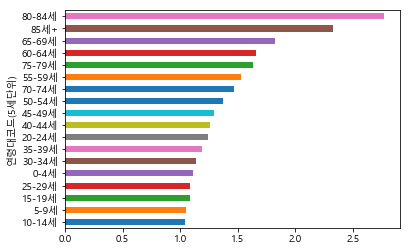

In [124]:
age_to_due.plot(kind='barh')

In [125]:
age_to_due=DataFrame(age_to_due).reset_index()
age_to_due

,연령대코드(5세단위),입내원일수
0,10-14세,1.038122
1,5-9세,1.052170
2,15-19세,1.088350
3,25-29세,1.088407
4,0-4세,1.110541
5,30-34세,1.137931
6,35-39세,1.189560
7,20-24세,1.240431
8,40-44세,1.256569
9,45-49세,1.294732


In [126]:
age_to_due.to_csv('data/new_data/age_to_due.csv', encoding='euc-kr')

##### 연령대별 최고 입내원일수 구하기

In [127]:
age_to_due_max = ndi.groupby(['연령대코드(5세단위)'])['입내원일수'].max()

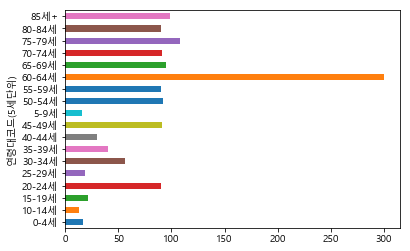

In [128]:
age_to_due_max.plot(kind='barh')

In [129]:
age_to_due_max = DataFrame(age_to_due_max).reset_index()
age_to_due_max

,연령대코드(5세단위),입내원일수
0,0-4세,17
1,10-14세,13
2,15-19세,22
3,20-24세,90
4,25-29세,19
5,30-34세,56
6,35-39세,40
7,40-44세,30
8,45-49세,91
9,5-9세,16


In [130]:
age_to_due_max.to_csv('data/new_data/age_to_due_max.csv', encoding='euc-kr')

### 연령대별 주상병 구하기
##### 연령대별 의료부서 빈도수 구하기

In [131]:
age_to_dep = ndi.groupby(['연령대코드(5세단위)'])['의료부서'].value_counts()

##### 0-4세를 대표로 의료부서 빈도수 구하기 

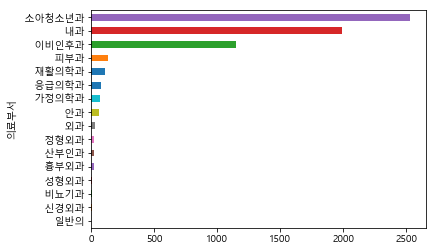

In [132]:
age_to_dep['0-4세'].sort_values().plot(kind='barh')

In [133]:
age_to_dep.to_csv('data/new_data/age_to_dep.csv', encoding='euc-kr')

##### 연령대별 가장 많이 찾는 의료부서

In [134]:
age_to_dep_max = ndi.groupby(['연령대코드(5세단위)']).apply(lambda x: x['의료부서'].value_counts().index[0])
age_to_dep_max = DataFrame(age_to_dep_max).reset_index()
age_to_dep_max

,연령대코드(5세단위),0
0,0-4세,소아청소년과
1,10-14세,내과
2,15-19세,내과
3,20-24세,내과
4,25-29세,내과
5,30-34세,내과
6,35-39세,내과
7,40-44세,내과
8,45-49세,내과
9,5-9세,내과


In [135]:
age_to_dep_max.to_csv('data/new_data/age_to_dep_max.csv', encoding='euc-kr')

##### 연령대별과 의료부서별 병명 빈도수 구하기

In [136]:
age_dep_to_ill = ndi.groupby(['연령대코드(5세단위)','의료부서'])['주상병이름'].value_counts()
DataFrame(age_dep_to_ill)

주상병이름
연령대코드(5세단위) 의료부서   주상병이름                                   
0-4세         가정의학과 상세불명의 급성 기관지염                         31
                   상세불명의 알레르기성 비염                        13
                   상세불명의 폐렴                               5
                   상세불명의 급성 세기관지염                         4
                   상세불명의 급성 인두염                           3
                   급성 인후두염                                2
                   급성 코인두염[감기]                            2
                   알레르기성 두드러기                             2
                   피부에 묻은 약물에 의한 알레르기성 접촉피부염              2
                   감염성 기원으로 추정되는 설사 및 위장염                 1
                   급성 폐쇄성 후두염[크루프]                        1
                   기타 피부병의 농가진화                           1
                   사슬알균에 의한 급성 기관지염                       1
                   상세불명 원인의 상세불명의 접촉피부염                   1
                   상세불명의 두드러기                             1
                   상세불명의 수두증                              1
             내과    상세불명의 급성 기관지염                        842
                   상세불명의 알레르기성 비염                       184
                   상세불명의 급성 인두염                         139
                   상세불명의 급성 세기관지염                       106
                   급성 코인두염[감기]                           91
                   상세불명의 급성 상기도 감염                       83
                   상세불명의 기관지 폐렴                          54
                   감염성 기원으로 추정되는 설사 및 위장염                44
                   상세불명의 천식                              33
                   상세불명의 폐렴                              33
                   급성인지 만성인지 명시되지 않은 기관지염                32
                   기타 알레르기성 비염                           32
                   상세불명의 만성 굴염                           31
                   기침                                    21
...                                                     ...
85세+         정형외과  특발성 통풍-아래팔                             2
                   기타 머리 부분의 열린 상처                        1
                   기타 및 상세불명의 목 부분의 관절 및 인대의 염좌 및 긴장      1
                   기타 및 상세불명의 손목 및 손 부분의 골절(폐쇄성)          1
                   기타 활막염 및 건초염-골반 부위 및 허벅지               1
                   눈꺼풀 및 눈주위 영역의 열린 상처                    1
                   병적 골절을 동반한 폐경기후 골다공증-골반 부위 및 허벅지       1
                   상세불명의 골다공증-다발 부위                       1
                   상세불명의 골다공증-상세불명 부위                     1
                   상세불명의 관절염-기타 부위                        1
                   상세불명의 척추증-상세불명의 부위                     1
                   신경뿌리병증을 동반한 기타 척추증-허리엉치 부위             1
                   좌골신경통-허리엉치부위                           1
                   좌골신경통을 동반한 허리통증-허리부위                   1
                   척추 협착-허리엉치 부위                          1
                   폐경기후 골다공증-상세불명 부위                      1
             피부과   상세불명의 피부염                             15
                   상세불명의 가려움                             10
                   상세불명 원인의 알레르기성 접촉피부염                   5
                   기타 합병증을 동반한 대상포진                       2
                   상세불명 원인의 상세불명의 접촉피부염                   2
                   상세불명 원인의 자극성 접촉피부염                     2
                   상세불명의 지루피부염                            2
                   기타 요인에 의한 상세불명의 접촉피부염                  1
                   기타 요인에 의한 알레르기성 접촉피부염                  1
                   만성 단순태선                                1
                   상세불명의 두드러기                             1
                   상세불명의 아토피 피부염                          1
                   손발톱 백선증                                1
                   알레르기성 두드러기                             1

[10879 rows x 1 columns]

In [137]:
age_dep_to_ill.to_csv('data/new_data/age_dep_to_ill.csv',encoding='euc-kr')

##### 연령대별 의료부서별 병명 최대 빈도수 구하기

In [138]:
age_dep_to_ill_max = ndi.groupby(['연령대코드(5세단위)','의료부서']).apply(lambda x : x['주상병이름'].value_counts().index[0])

In [139]:
DataFrame(age_dep_to_ill_max).reset_index()

,연령대코드(5세단위),의료부서,0
0,0-4세,가정의학과,상세불명의 급성 기관지염
1,0-4세,내과,상세불명의 급성 기관지염
2,0-4세,비뇨기과,상세불명 원인의 상세불명의 접촉피부염
3,0-4세,산부인과,급성 인후두염
4,0-4세,성형외과,기타 머리 부분의 열린 상처
5,0-4세,소아청소년과,상세불명의 급성 기관지염
6,0-4세,신경외과,상세불명의 수두증
7,0-4세,안과,상세불명의 급성 결막염
8,0-4세,외과,헤르페스바이러스 치은(잇몸)구내염 및 인두편도염
9,0-4세,응급의학과,상세불명의 급성 기관지염


In [140]:
age_dep_to_ill_max.to_csv('data/new_data/age_dep_to_ill_max.csv',encoding='euc-kr')

### 각 의료부서 별 환자 대상으로 남녀 성비

##### 각 의료부서 별 전체 환자 수 구하기

In [141]:
dep_to_listid = ndi.groupby(['의료부서'])['진료내역일련번호'].count()
DataFrame(dep_to_listid)

,진료내역일련번호
의료부서,
가정의학과,2032
결핵과,1
내과,24052
마취통증의학과,1194
방사선 종양학과,36
비뇨기과,1028
산부인과,193
산업의학과,8
성형외과,41


##### 의료부서 별  남, 녀  환자 수 각각 구하기

In [142]:
dep_to_sex = ndi.groupby(['의료부서'])['성별코드'].value_counts().sort_values(ascending=False)
DataFrame(dep_to_sex)

성별코드
의료부서      성별코드       
 내과       여     13830
          남     10222
 정형외과     여      8333
          남      4676
 이비인후과    여      4601
          남      3541
 피부과      여      2416
 소아청소년과   남      2340
          여      2185
 피부과      남      2025
 가정의학과    여      1144
 신경외과     여      1019
 외과       여       928
 안과       여       927
 가정의학과    남       888
 외과       남       777
 신경과      여       759
 신경외과     남       728
 마취통증의학과  여       695
 안과       남       682
 재활의학과    여       633
 비뇨기과     여       570
 신경과      남       566
 재활의학과    남       566
 마취통증의학과  남       499
 비뇨기과     남       458
 응급의학과    남       333
          여       291
 일반의      여       171
 산부인과     여       170
 일반의      남       123
 흉부외과     여       110
          남        62
 영상의학과    남        47
          여        42
 방사선 종양학과 남        36
 핵의학과     여        29
 산부인과     남        23
 성형외과     남        21
          여        20
 정신과      여        13
 산업의학과    남         4
          여         4
 정신과      남         1
 결핵과      남         1

##### 비율 구하기

In [143]:
rate_dep_to_sex = dep_to_sex / dep_to_listid
DataFrame(rate_dep_to_sex)

0
의료부서      성별코드          
 내과       여     0.575004
          남     0.424996
 정형외과     여     0.640557
          남     0.359443
 이비인후과    여     0.565095
          남     0.434905
 피부과      여     0.544022
 소아청소년과   남     0.517127
          여     0.482873
 피부과      남     0.455978
 가정의학과    여     0.562992
 신경외과     여     0.583286
 외과       여     0.544282
 안과       여     0.576134
 가정의학과    남     0.437008
 외과       남     0.455718
 신경과      여     0.572830
 신경외과     남     0.416714
 마취통증의학과  여     0.582077
 안과       남     0.423866
 재활의학과    여     0.527940
 비뇨기과     여     0.554475
 신경과      남     0.427170
 재활의학과    남     0.472060
 마취통증의학과  남     0.417923
 비뇨기과     남     0.445525
 응급의학과    남     0.533654
          여     0.466346
 일반의      여     0.581633
 산부인과     여     0.880829
 일반의      남     0.418367
 흉부외과     여     0.639535
          남     0.360465
 영상의학과    남     0.528090
          여     0.471910
 방사선 종양학과 남     1.000000
 핵의학과     여     1.000000
 산부인과     남     0.119171
 성형외과     남     0.512195
          여     0.487805
 정신과      여     0.928571
 산업의학과    남     0.500000
          여     0.500000
 정신과      남     0.071429
 결핵과      남     1.000000

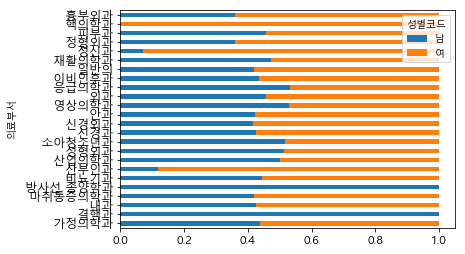

In [144]:
rate_dep_to_sex.unstack().plot(kind='barh', stacked=True, fontsize=12)

In [145]:
rate_dep_to_sex = DataFrame(rate_dep_to_sex).reset_index()
rate_dep_to_sex.to_csv('data/new_data/rate_dep_to_sex.csv', encoding = 'euc-kr')

##### 특이사항 : 비뇨기과 환자가 남성보다 여성이 더 많다는 결과 나옴
##### 특이사항 이유 분석 시작
##### 의료부서와 성별코드를 기준으로 주상병이름을 groupby 후 각 그룹별 가장 많은 주상병 찾기

In [146]:
dep_sex_to_ill = ndi.groupby(['의료부서','성별코드'])['주상병이름'].value_counts()
DataFrame(dep_sex_to_ill)

주상병이름
의료부서   성별코드 주상병이름                               
 가정의학과 남    상세불명의 급성 기관지염                    129
            척추 협착-허리엉치 부위                     59
            아래허리통증-허리부위                       34
            신경뿌리병증을 동반한 허리척추뼈 및 기타 추간판 장애     31
            상세불명 원인의 알레르기성 접촉피부염              30
            상세불명의 척추증-허리엉치 부위                 30
            상세불명의 알레르기성 비염                    27
            상세불명의 급성 인두염                      22
            급성 인후두염                           21
            상세불명의 어깨 병터                       21
            급성인지 만성인지 명시되지 않은 기관지염            20
            기타 명시된 대사 장애                      16
            수면 개시 및 유지 장애[불면증]                13
            식도염을 동반한 위-식도역류질환                 12
            척추분리증-허리 부위                       12
            합병증이 없는 인슐린-비의존 당뇨병               12
            경추통-목부위                           11
            상세불명의 급성 상기도 감염                   11
            상세불명의 두드러기                        11
            혼합성 고지혈증                          11
            급성 코인두염[감기]                       10
            기타 및 상세불명의 손 부분의 염좌 및 긴장          10
            알레르기성 두드러기                        10
            대상포진후 신경통                          9
            척추 협착-허리 부위                        9
            상세불명의 급성 하기도 감염                    8
            급성 후두기관염                           7
            관절통(증)-위팔                          6
            기타 급성 위염                           6
            기타 알레르기성 비염                        6
...                                          ...
 흉부외과  여    만성 비염                              4
            아래허리통증-허리부위                        4
            양쪽성 원발성 무릎관절증                      4
            가슴샘의 악성신생물                         3
            급성 인후두염                            3
            상세불명 원인의 알레르기성 접촉피부염               3
            콩팥(신장)동맥의 동맥류                      3
            경추상완 증후군-목 부위                      2
            급성인지 만성인지 명시되지 않은 기관지염             2
            기타 자발성 공기가슴증                       2
            등통증-등허리부위                          2
            부위가 명시되지 않은 요로 감염                  2
            상세불명의 신경통 및 신경염-다발 부위              2
            가슴샘의 행동양식 불명 또는 미상의 신생물            1
            국한적 다한증                            1
            굴기능부전 증후군                          1
            급성 후두기관염                           1
            기타 가슴통증                            1
            기타 급성 위염                           1
            기타 위염                              1
            기타 활막염 및 건초염-어깨 부위                 1
            발 백선증                              1
            상세불명의 급성 상기도 감염                    1
            상세불명의 뇌혈관 질환                       1
            상세불명의 비감염성 위장염 및 대장염(큰창자염)         1
            상세불명의 위 및 십이지장의 질환                 1
            손톱의 손상이 없는 손가락의 열린 상처              1
            아래허리통증-허리엉치부위                      1
            입의 연조직염 및 고름집(농양)                  1
            팔목 터널 증후군                          1

[5137 rows x 1 columns]

##### 비뇨기과만 확인

In [147]:
DataFrame(dep_sex_to_ill[' 비뇨기과'].sort_values())

주상병이름
성별코드 주상병이름                            
남    팔신경얼기 장애                        1
여    피부표기증성 두드러기                     1
남    전립샘방광염                          1
     일반적 의학검사                        1
     옴                               1
     약물 또는 약제의 상세불명의 부작용             1
     상세불명의 비대성 피부 장애                 1
     상세불명의 방광염                       1
     상세불명의 모낭 장애                     1
     상세불명의 기립성 단백뇨증                  1
     상세불명의 관절염-기타 부위                 1
     발 백선증                           1
     만성 얕은 위염                        1
     두근거림                            1
     농피증                             1
     내향성 손[발]톱                       1
     기타 화학물질에 의한 상세불명의 접촉피부염         1
     기타 절지동물의 독액의 중독작용               1
     표피낭                             1
     헤르페스바이러스 치은(잇몸)구내염 및 인두편도염      1
여    고름집(농양)이 있는 모소낭                 1
     기타 급성 신염 증후군                    1
     팥(신장) 및 콩팥(신장)주위 고름집(농양)        1
     지루 각화증                          1
     중추기원의 현기증                       1
     중독성 홍반                          1
     식도염을 동반하지 않은 위-식도 역류질환          1
     상세불명의 피부염                       1
     상세불명의 원형 탈모증                    1
     상세불명의 양성 지방종성 신생물               1
...                                ...
남    기타 방광의 신경근육 기능장애                7
     기타 요인에 의한 알레르기성 접촉피부염           8
여    사이질성 방광염(만성)                    8
남    만성 단순태선                         8
     기타 합병증을 동반한 대상포진                8
여    손발톱 백선증                         8
남    상세불명의 피부염                       8
     상세불명 원인의 자극성 접촉피부염              9
     상세불명의 전립샘의 염증성 질환               9
여    발 백선증                           9
남    기타 신경계통 침범을 동반한 대상포진           10
여    기타 방광염                         10
     방광의 양성 신생물                     10
남    상세불명 방광의 악성신생물                 10
     기타 요도염                         12
     급성 방광염                         12
여    요관의 결석                         12
남    체부 백선증                         14
     부위가 명시되지 않은 요로 감염              19
     요관의 결석                         19
여    부위가 명시되지 않은 요로 감염              20
     급성 세뇨관-사이질성 신염                 23
남    상세불명 원인의 알레르기성 접촉피부염           26
여    기타 만성 방광염                      28
     상세불명 원인의 알레르기성 접촉피부염           32
     상세불명의 방광의 신경근육 기능장애            45
남    만성 전립샘염                        63
여    상세불명의 방광염                      64
남    비특이성 요도염                       75
여    급성 방광염                        128

[150 rows x 1 columns]

In [148]:
dep_sex_to_ill = DataFrame(dep_sex_to_ill)
dep_sex_to_ill.to_csv('data/new_data/dep_sex_to_ill.csv',encoding='euc-kr')

##### 비뇨기과를 찾는 환자 중 가장 많은 주상병 찾기

In [149]:
dep_sex_to_ill_max = ndi.groupby(['의료부서','성별코드']).apply(lambda x : x['주상병이름'].value_counts().index[0])

In [150]:
dep_sex_to_ill_max=DataFrame(dep_sex_to_ill_max[' 비뇨기과'].sort_values()).reset_index()
dep_sex_to_ill_max

,성별코드,0
0,여,급성 방광염
1,남,비특이성 요도염


In [151]:
dep_sex_to_ill_max.to_csv('data/new_data/dep_sex_to_ill_max.csv', encoding='euc-kr')

### 주상병별 재진률 구하기
##### 같은 병으로 여러번 진료를 받은 환자를 찾음 (counts가 2 이상이면 해당 주상병으로 2번 이상 방문했다는 뜻)

In [152]:
ill_to_person_base = ndi.groupby(['주상병이름'])['가입자일련번호'].value_counts()
ill_to_person_base = DataFrame({ 'counts' : ill_to_person_base}).reset_index()
ill_to_person_base

,주상병이름,가입자일련번호,counts
0,위 및 십이지장의 폴립,2562,3
1,위 및 십이지장의 폴립,2953,3
2,위 및 십이지장의 폴립,1641,2
3,위 및 십이지장의 폴립,4249,2
4,위 및 십이지장의 폴립,8443,2
5,위 및 십이지장의 폴립,202,1
6,위 및 십이지장의 폴립,2804,1
7,위 및 십이지장의 폴립,5315,1
8,위 및 십이지장의 폴립,5844,1
9,위 및 십이지장의 폴립,6682,1


##### 주상병 별 진료 받은 모든 환자 수를 구함

In [153]:
ill_to_person_tot = ill_to_person_base.groupby(['주상병이름'])['가입자일련번호'].count()
DataFrame(ill_to_person_tot).reset_index()

,주상병이름,가입자일련번호
0,위 및 십이지장의 폴립,15
1,(관절병증을 동반한) 헤베르덴결절,1
2,(만성)실혈에 속발된 철 겹핍성 빈혈,4
3,(울혈성) 심장기능상실(심부전) 및 콩팥(신장)기능상실을 동반한 고혈압성 심장 및 ...,2
4,(울혈성) 심장기능상실(심부전)을 동반한 고혈압성 심장 및 콩팥(신장)병,2
5,(울혈성) 심장기능상실(심부전)을 동반한 고혈압성 심장병,11
6,(울혈성) 심장기능상실(심부전)이 없는 고혈압성 심장병,43
7,(후천성)엄지발가락 외반증,5
8,1도 일광화상,1
9,가래 이상,5


##### 주상병 별 1번 방문한 가입자는 제거 (재진을 받지 않은 가입자 제거)

In [154]:
ill_to_person_dup = ill_to_person_base[ill_to_person_base.counts != 1]
ill_to_person_dup = DataFrame(ill_to_person_dup).reset_index()
ill_to_person_dup

,index,주상병이름,가입자일련번호,counts
0,0,위 및 십이지장의 폴립,2562,3
1,1,위 및 십이지장의 폴립,2953,3
2,2,위 및 십이지장의 폴립,1641,2
3,3,위 및 십이지장의 폴립,4249,2
4,4,위 및 십이지장의 폴립,8443,2
5,15,(관절병증을 동반한) 헤베르덴결절,5123,5
6,16,(만성)실혈에 속발된 철 겹핍성 빈혈,5184,2
7,20,(울혈성) 심장기능상실(심부전) 및 콩팥(신장)기능상실을 동반한 고혈압성 심장 및 ...,5124,6
8,21,(울혈성) 심장기능상실(심부전) 및 콩팥(신장)기능상실을 동반한 고혈압성 심장 및 ...,6989,2
9,22,(울혈성) 심장기능상실(심부전)을 동반한 고혈압성 심장 및 콩팥(신장)병,2995,3


##### 주상병 별 재진을 받은 가입자 수를 셈

In [155]:
ill_to_person_cont = ill_to_person_dup.groupby(['주상병이름'])['가입자일련번호'].count()
DataFrame(ill_to_person_cont).reset_index()

,주상병이름,가입자일련번호
0,위 및 십이지장의 폴립,5
1,(관절병증을 동반한) 헤베르덴결절,1
2,(만성)실혈에 속발된 철 겹핍성 빈혈,1
3,(울혈성) 심장기능상실(심부전) 및 콩팥(신장)기능상실을 동반한 고혈압성 심장 및 ...,2
4,(울혈성) 심장기능상실(심부전)을 동반한 고혈압성 심장 및 콩팥(신장)병,1
5,(울혈성) 심장기능상실(심부전)을 동반한 고혈압성 심장병,9
6,(울혈성) 심장기능상실(심부전)이 없는 고혈압성 심장병,30
7,(후천성)엄지발가락 외반증,3
8,가래 이상,2
9,가슴샘의 악성신생물,1


##### 주상병 별 재진을 받은 환자를 전체 환자 수로 나누고 100을 곱함 (즉, 주상병 별 재진 확률을 구함)

In [156]:
rate_second_visit = ill_to_person_cont / ill_to_person_tot * 100
rate_second_visit = DataFrame(rate_second_visit).reset_index()

##### 이상치 제거
##### 어느 한 주상병(질병)에 대해 한 명의 환자가 진료를 여러 번 받았을 경우 재진률이 100%
#####  어느 한 주상병에 대해 한 명의 환자가 진료를 한 번 받은 경우  ill_to_person_tot 데이터프레임에는 해당 로우가 포함되어 있지만, ill_to_person_dup 데이터프레임에 의해 삭제가 되어, 재진 환자 데이터프레임에는 해당 로우가 존재하지 않음 따라서 재진률이 Nan

In [157]:
rate_second_visit = rate_second_visit.dropna()
rate_second_visit = rate_second_visit[rate_second_visit.가입자일련번호 != 100.]
rate_second_visit= rate_second_visit.rename(columns={'가입자일련번호':'재진률'})
rate_second_visit

,주상병이름,재진률
0,위 및 십이지장의 폴립,33.333333
2,(만성)실혈에 속발된 철 겹핍성 빈혈,25.000000
4,(울혈성) 심장기능상실(심부전)을 동반한 고혈압성 심장 및 콩팥(신장)병,50.000000
5,(울혈성) 심장기능상실(심부전)을 동반한 고혈압성 심장병,81.818182
6,(울혈성) 심장기능상실(심부전)이 없는 고혈압성 심장병,69.767442
7,(후천성)엄지발가락 외반증,60.000000
9,가래 이상,40.000000
20,각막의 기타 명시된 장애,50.000000
21,각막의 이물,9.090909
23,각혈,50.000000


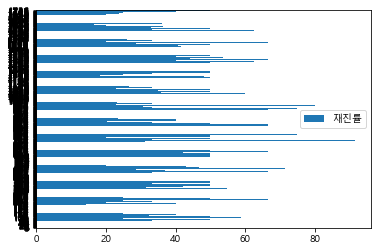

In [158]:
rate_second_visit.plot(kind='barh')

In [159]:
max_rate = rate_second_visit.apply(lambda x : x.max())
DataFrame(max_rate)

,0
주상병이름,휴지기 탈모
재진률,91.6667


In [160]:
rate_second_visit.to_csv('data/new_data/rate_second_visit.csv', encoding= 'euc-kr')

# 이상입니다